In [98]:
import seaborn as sns


In [149]:
df = sns.load_dataset('iris')

In [150]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [151]:
df = df.iloc[:,1:]

In [148]:
df.head()

,petal_length,species
70,4.8,1
120,5.7,2
79,3.5,1
134,5.6,2
99,4.1,1


In [103]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [104]:
df.shape

(150, 4)

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encoder = LabelEncoder()

In [107]:
df.species.value_counts

<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

In [108]:
df.species= encoder.fit_transform(df['species'])

In [109]:
df.species.unique()

array([0, 1, 2])

In [110]:
df[df['species'] != 0]

,sepal_width,petal_length,petal_width,species
50,3.2,4.7,1.4,1
51,3.2,4.5,1.5,1
52,3.1,4.9,1.5,1
53,2.3,4.0,1.3,1
54,2.8,4.6,1.5,1
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [111]:
df= df[df['species'] != 0][['sepal_width', 'petal_length','species']]

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

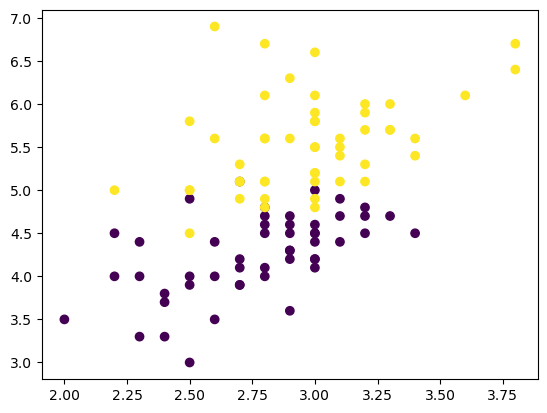

In [113]:
plt.scatter(df['sepal_width'], df['petal_length'], c=df['species'],cmap=None)

In [114]:
df.shape

(100, 3)

In [116]:
df_train = df.iloc[:60,:]. sample(10)
df_train

,sepal_width,petal_length,species
53,2.3,4.0,1
107,2.9,6.3,2
61,3.0,4.2,1
67,2.7,4.1,1
59,2.7,3.9,1
99,2.8,4.1,1
87,2.3,4.4,1
98,2.5,3.0,1
72,2.5,4.9,1
78,2.9,4.5,1


In [118]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val= df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [119]:
df.shape

(100, 3)

In [120]:
df_train

,sepal_width,petal_length,species
56,3.3,4.7,1
74,2.9,4.3,1
86,3.1,4.7,1
132,2.8,5.6,2
107,2.9,6.3,2
115,3.2,5.3,2
133,2.8,5.1,2
88,3.0,4.1,1
62,2.2,4.0,1
55,2.8,4.5,1


In [121]:
df_val

,sepal_width,petal_length,species
109,3.6,6.1,2
118,2.6,6.9,2
131,3.8,6.4,2
148,3.4,5.4,2
130,2.8,6.1,2


In [122]:
df_test

,sepal_width,petal_length,species
104,3.0,5.8,2
53,2.3,4.0,1
97,2.9,4.3,1
76,2.8,4.8,1
129,3.0,5.8,2


In [123]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [124]:
y_test

array([2, 2, 2, 2, 2])

# Bagging 

In [125]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [126]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [127]:
df_bag

,sepal_width,petal_length,species
107,2.9,6.3,2
55,2.8,4.5,1
88,3.0,4.1,1
107,2.9,6.3,2
56,3.3,4.7,1
132,2.8,5.6,2
55,2.8,4.5,1
86,3.1,4.7,1


In [129]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -                                        0.0/1.4 MB 281.8 kB/s eta 0:00:05
     ---                                      0.1/1.4 MB 595.3 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 595.3 kB/s eta 0:00:03
     -----                                    0.2/1.4 MB 692.9 kB/s eta 0:00:02
     --------                                 0.3/1.4 MB 930.9 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 912.8 kB/s eta 0:00:02
     --------------                           0.5/1.4 MB 1.2 MB/s eta 0:00:01
     ----------------                         0.5/1.4 MB 1.3 MB/s eta 0:00:01
     -------------------                      0.6/1.4 MB 1.3 MB/s eta 0:00:01
     -----------------------                  0.8/1.4 MB 1.

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [131]:
dt_bag1 = DecisionTreeClassifier()

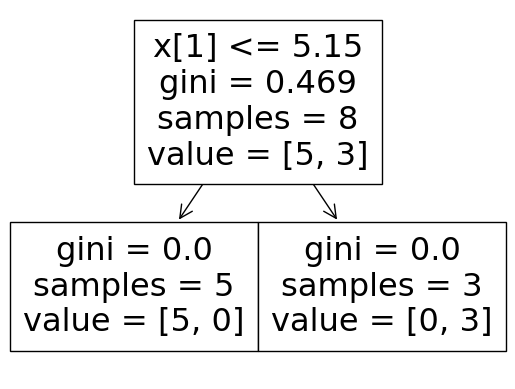

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


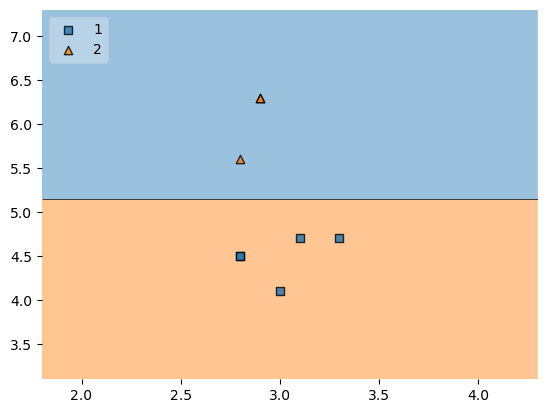

In [132]:
evaluate(dt_bag1,X,y)

In [133]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
56,3.3,4.7,1
62,2.2,4.0,1
62,2.2,4.0,1
55,2.8,4.5,1
56,3.3,4.7,1
62,2.2,4.0,1
107,2.9,6.3,2
74,2.9,4.3,1


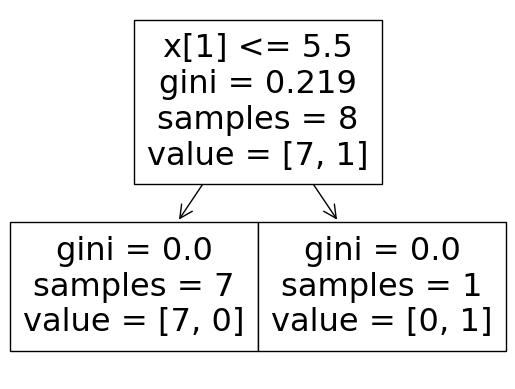

0.8


C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


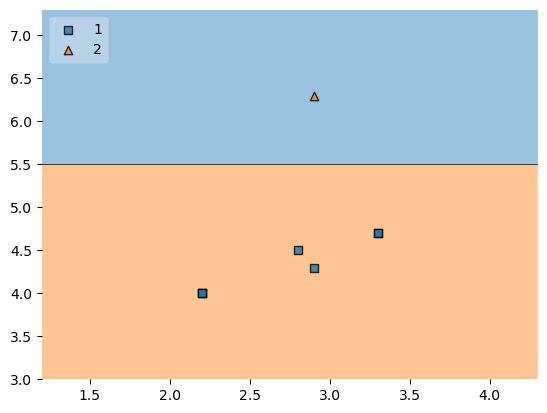

In [134]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

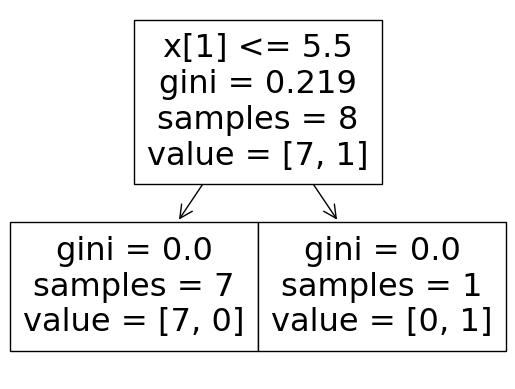

0.8


C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


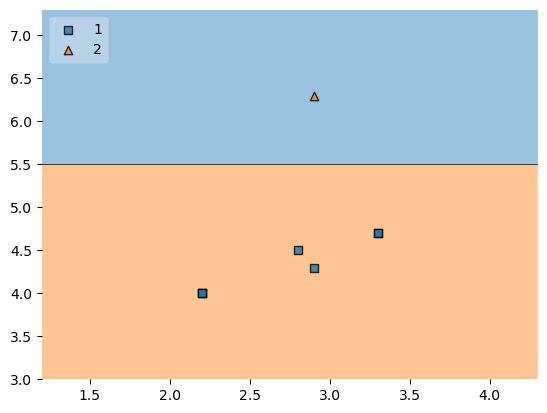

In [136]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# predict

In [137]:
df_test

,sepal_width,petal_length,species
104,3.0,5.8,2
53,2.3,4.0,1
97,2.9,4.3,1
76,2.8,4.8,1
129,3.0,5.8,2


In [138]:
import numpy as np

In [139]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting 

In [140]:
df_train

,sepal_width,petal_length,species
56,3.3,4.7,1
74,2.9,4.3,1
86,3.1,4.7,1
132,2.8,5.6,2
107,2.9,6.3,2
115,3.2,5.3,2
133,2.8,5.1,2
88,3.0,4.1,1
62,2.2,4.0,1
55,2.8,4.5,1


In [141]:
df_train.sample(8)

,sepal_width,petal_length,species
55,2.8,4.5,1
88,3.0,4.1,1
132,2.8,5.6,2
74,2.9,4.3,1
133,2.8,5.1,2
86,3.1,4.7,1
115,3.2,5.3,2
62,2.2,4.0,1


# random subspaces

In [142]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [143]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
20,5.4,3.4,1.7,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
88,5.6,3.0,4.1,1.3,versicolor
12,4.8,3.0,1.4,0.1,setosa
95,5.7,3.0,4.2,1.2,versicolor
29,4.7,3.2,1.6,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa


In [144]:
df1.sample(2,replace=True,axis=1)

,petal_width,petal_width
38,0.2,0.2
16,0.4,0.4
20,0.2,0.2
22,0.2,0.2
37,0.1,0.1
88,1.3,1.3
12,0.1,0.1
95,1.2,1.2
29,0.2,0.2
0,0.2,0.2


# Random patches

In [146]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
20,5.4,3.4,1.7,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
88,5.6,3.0,4.1,1.3,versicolor
12,4.8,3.0,1.4,0.1,setosa
95,5.7,3.0,4.2,1.2,versicolor
29,4.7,3.2,1.6,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa


In [145]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,species,petal_width
88,versicolor,1.3
16,setosa,0.4
20,setosa,0.2
22,setosa,0.2
22,setosa,0.2
20,setosa,0.2
0,setosa,0.2
38,setosa,0.2
